<a href="https://colab.research.google.com/github/ranton256/stats_notebooks/blob/main/Paired_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paired T-Test Hypothesis

Assesses the mean difference between the pairs.

- Null hypothesis: The mean of the paired differences equals zero in the population.
- Alternative hypothesis: The mean of the paired differences does not equal zero in the population.
  - The two-tailed alternative hypothesis (𝐻1) assumes that 𝜇𝑑 is not equal to zero.
  - The upper-tailed alternative hypothesis (𝐻1) assumes that 𝜇𝑑 is greater than zero.
  - The lower-tailed alternative hypothesis (𝐻1) assumes that 𝜇𝑑 is less than zero.

## Assumptions

- You have a random sample with independent subjects
- Paired samples: assesses the mean difference between the pairs. These are also known as dependent samples.
- The dependent variable must be continuous.
- Data should be normally distributed or sample size N > 20
  - check for outliers because they can throw off the results.


### Alternate wording of assumptions


- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.


## References

- <https://statisticsbyjim.com/hypothesis-testing/paired-t-test/>
- <https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/>
- <https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/paired-t-test.html>



## Procedure

The procedure for a paired sample t-test can be summed up in four steps. The symbols to be used are defined below:

```txt
𝐷 = Differences between two paired samples
𝑑𝑖 = The 𝑖𝑡ℎ observation in 𝐷
𝑛 = The sample size
𝑑⎯⎯⎯ = The sample mean of the differences
𝜎̂  = The sample standard deviation of the differences
𝑇 =The critical value of a t-distribution with (𝑛 − 1
) degrees of freedom
𝑡 = The t-statistic (t-test statistic) for a paired sample t-test
𝑝 = The 𝑝-value (probability value) for the t-statistic.

```

1. Calculate the sample mean
2. Calculate the standard deviation (of the sample diff)
3. Calculate the test statistic
4. Calculate the probability of observing the test statistic under the null hypothesis. obtained by comparing t to a t-distribution with (𝑛 − 1) degrees of freedom. (by looking up the value in a table, or with statistical software).




# SciPy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel


In [1]:
import numpy as np

from scipy import stats

rng = np.random.default_rng()

In [2]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

rvs2 = (stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

        + stats.norm.rvs(scale=0.2, size=500, random_state=rng))

stats.ttest_rel(rvs1, rvs2)


TtestResult(statistic=-0.2519569948347526, pvalue=0.8011780425060282, df=499)

In [3]:

rvs3 = (stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng)

        + stats.norm.rvs(scale=0.2, size=500, random_state=rng))

stats.ttest_rel(rvs1, rvs3)


TtestResult(statistic=-4.400417026273636, pvalue=1.3220343575969364e-05, df=499)

https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/#data-used

In [5]:
bp_data_url = "https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/refs/heads/master/blood_pressure.csv"
from urllib.request import urlretrieve
urlretrieve(bp_data_url, "blood_pressure.csv")

('blood_pressure.csv', <http.client.HTTPMessage at 0x7c8093c392d0>)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [9]:
df.columns

Index(['patient', 'sex', 'agegrp', 'bp_before', 'bp_after'], dtype='object')

In [14]:
#df.hist(column = "bp_before")
#df.hist(column = "bp_after")

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

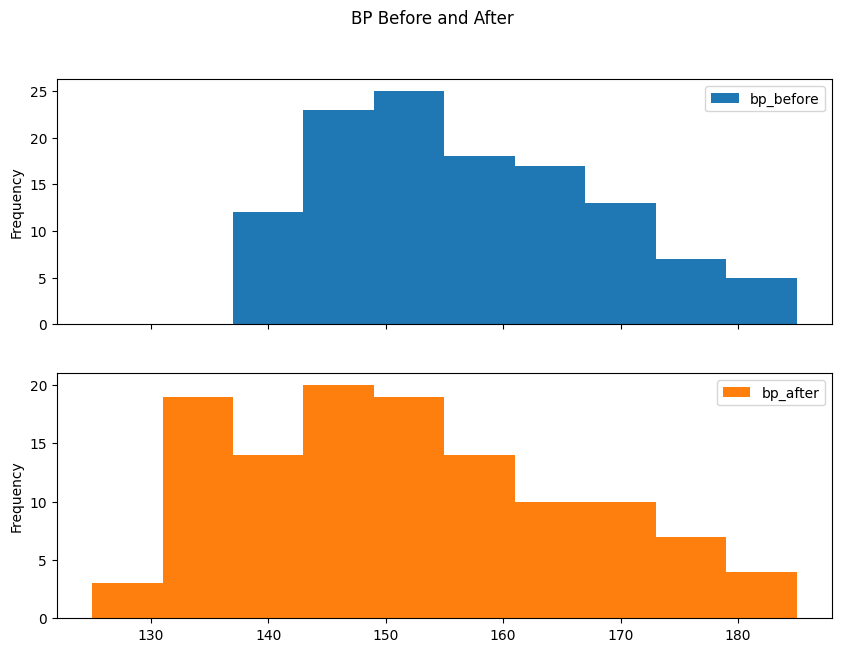

In [18]:
df[['bp_before','bp_after']].plot(kind = "hist", subplots=True, title="BP Before and After", figsize=(10,7))

In [16]:
import seaborn as sns

In [25]:
# sns.boxplot(data=df, y="bp_before")
#sns.boxplot(data=df, y="bp_after")

In [26]:

df_melted = pd.melt(df[['bp_before','bp_after']])
#df_melted

<Axes: xlabel='variable', ylabel='value'>

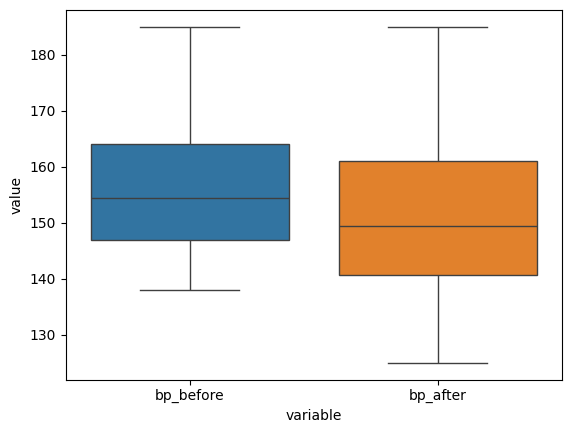

In [27]:
sns.boxplot(x='variable', y='value', data=df_melted, hue='variable')

In [28]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

In [29]:
# these findings are statistically significant